In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([3, 5, 2, ..., 6, 5, 1])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 3 8 8] [3 5 2 ... 6 5 1]
0.09741463414634147
Iteration:  10
[3 3 3 ... 3 8 8] [3 5 2 ... 6 5 1]
0.1272439024390244
Iteration:  20
[3 3 3 ... 3 8 1] [3 5 2 ... 6 5 1]
0.19534146341463415
Iteration:  30
[3 3 0 ... 0 8 1] [3 5 2 ... 6 5 1]
0.2681707317073171
Iteration:  40
[0 3 0 ... 0 8 1] [3 5 2 ... 6 5 1]
0.3317560975609756
Iteration:  50
[0 3 0 ... 0 8 8] [3 5 2 ... 6 5 1]
0.3738292682926829
Iteration:  60
[0 3 6 ... 0 8 8] [3 5 2 ... 6 5 1]
0.40973170731707315
Iteration:  70
[0 3 6 ... 0 8 1] [3 5 2 ... 6 5 1]
0.44034146341463415
Iteration:  80
[0 3 6 ... 0 8 1] [3 5 2 ... 6 5 1]
0.46770731707317076
Iteration:  90
[0 3 6 ... 6 8 1] [3 5 2 ... 6 5 1]
0.5015365853658537
Iteration:  100
[0 0 6 ... 6 8 1] [3 5 2 ... 6 5 1]
0.5271463414634147
Iteration:  110
[0 2 6 ... 6 8 1] [3 5 2 ... 6 5 1]
0.5539512195121952
Iteration:  120
[0 2 6 ... 6 8 1] [3 5 2 ... 6 5 1]
0.5804390243902439
Iteration:  130
[0 2 6 ... 6 8 1] [3 5 2 ... 6 5 1]
0.6032682926829268
Iteration:  

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  3


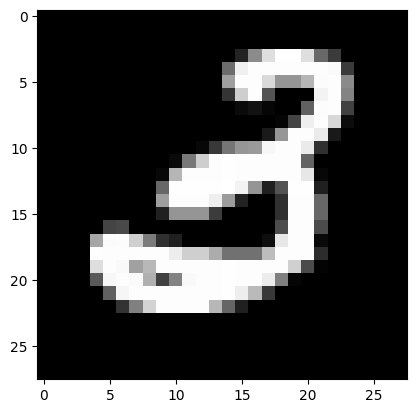

Prediction:  [5]
Label:  5


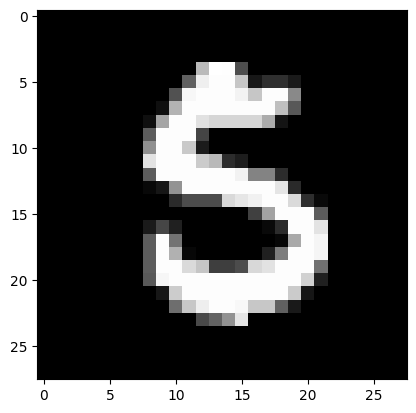

Prediction:  [2]
Label:  2


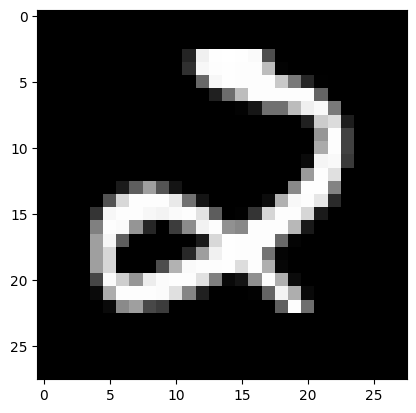

Prediction:  [0]
Label:  0


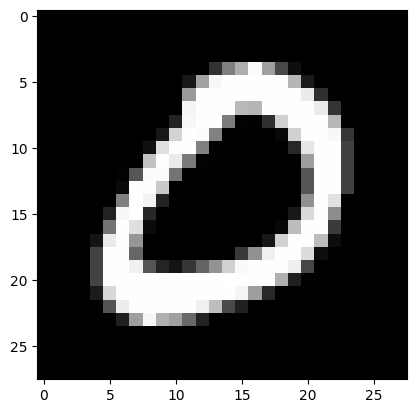

In [13]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [14]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 3 1 1 0 1 9 9 3 6 2 6 1 7 5 3 6 4 9 5 8 4 9 1 9 2 9 5 2 7 2 3 7 8 2 4 4
 2 1 9 8 6 9 4 1 6 9 0 5 3 9 9 7 5 5 2 8 7 9 8 4 6 4 3 9 2 0 8 0 6 7 1 7 5
 3 0 5 2 5 8 6 0 1 8 3 5 8 3 9 9 8 1 9 5 6 8 7 2 6 1 7 3 5 3 9 8 0 5 9 7 7
 6 1 6 4 9 2 4 1 4 1 8 9 3 1 2 3 2 6 4 6 3 5 4 3 6 9 2 7 7 0 6 2 6 0 1 8 0
 8 8 3 8 0 3 0 1 4 1 1 7 6 1 3 4 5 3 4 6 1 6 7 4 3 3 0 3 4 2 8 0 5 5 2 5 6
 1 1 1 4 6 2 4 3 9 0 7 9 5 3 9 6 8 4 2 2 6 6 7 9 6 2 3 7 5 7 4 2 3 8 1 8 5
 1 2 0 9 1 1 3 0 1 5 1 8 7 0 8 1 4 7 4 3 6 5 8 0 4 8 6 9 8 6 8 1 9 0 5 3 2
 4 7 9 2 0 4 9 9 7 2 1 9 5 2 4 7 8 0 7 9 9 2 0 7 3 3 4 6 1 9 5 8 6 2 4 5 3
 0 9 3 2 6 6 8 9 0 2 3 8 1 1 7 0 5 2 3 8 0 2 3 5 7 0 7 3 0 3 2 1 1 2 7 4 4
 5 5 5 7 1 9 0 6 5 9 4 3 6 8 0 1 3 4 3 4 7 0 6 7 7 5 9 1 6 1 1 2 7 3 5 7 4
 7 2 8 9 9 5 3 4 6 5 7 0 2 2 3 1 1 9 0 4 6 0 0 6 7 5 9 6 6 7 7 6 8 9 1 3 3
 3 2 6 9 1 0 8 8 6 9 5 9 9 7 7 1 1 9 7 2 3 8 9 9 5 8 3 8 3 3 1 6 1 7 5 0 0
 4 3 7 8 0 6 5 8 9 1 6 9 8 5 7 7 0 6 4 7 6 0 3 0 5 9 3 4 6 1 2 5 6 2 3 0 8
 4 6 1 5 1 2 9 0 2 1 0 1 

0.843